# Caso Curso Google Análisis de Datos - Bellabeat

In [1]:
#librerias para trabajar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#descarga de tablas con las que realizaré el análisis. Tabla 1 actividad
df_activity= pd.read_csv('dailyActivity_merged.csv ')

#tabla 2 resgitro de sueño
df_sleep= pd.read_csv('sleepDay_merged.csv')

In [3]:
#consulta de la primera tabla actividad diaria

df_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
#consulta de las variables y si están datos nulos

df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

#### Datos tabla actividad diaria:

- Los datos nos dicen que contamos con un total de 940 filas y ningún valor nulo.
La variable de fechas, está en un formato incorrecto y debemos modificarlo
Algunos datos son mediciones en kilometros, mientras que otros son de minutos. Voy a escoger las variables de minutos para el análisis.
Fuente- Fitabase Data Dictionary: https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf

In [5]:
# consulta de valores duplicados

df_activity.duplicated().sum()

0

In [6]:
# consulta de la distribucuón estadística de los datos

df_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
# corregir el formato de fecha 

df_activity['ActivityDate']= pd.to_datetime(df_activity['ActivityDate'], dayfirst=False)

In [8]:
#creación de columna de días de la semana

df_activity['Day_OfWeek']=df_activity['ActivityDate'].dt.day_name()

#### Datos tabla de sueño

In [9]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
# consulta tipo de datos

df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [11]:
# consulta de valores duplicados

df_sleep.duplicated().sum()

3

In [12]:
# eliminación de valores duplicados en la tabla de sueño

df_sleep= df_sleep.drop_duplicates()

In [13]:
# consulta de distribucuón estadística

df_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [14]:
# dar formato correcto de fecha a la columna de sleepday

df_sleep['ActivityDate']= pd.to_datetime(df_sleep['SleepDay'], dayfirst=False)

#### Unión de tablas

In [15]:
# union de las tablas de actividad y sueño. Creación de nuevo dataframe

df= df_activity.merge(df_sleep, how='inner', on=['Id','ActivityDate'])

In [16]:
# consulta de información de los tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   ActivityDate              410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

## Análisis

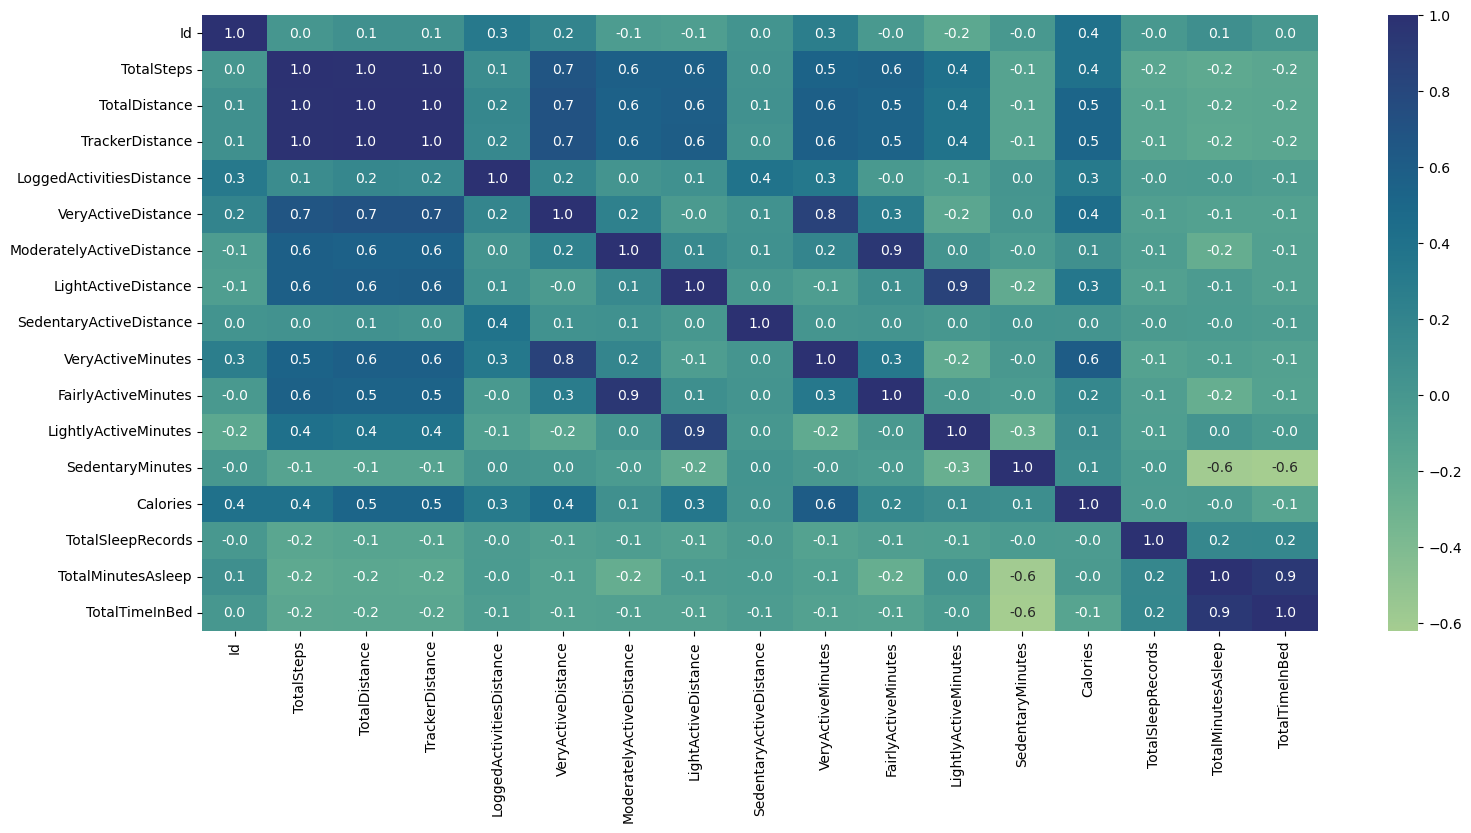

In [17]:
# consulta de la correlación de las variables

corr= df.corr()

plt.figure(figsize= (18,8))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".1f")
plt.show()

- Algunas variables muestran una correlación ascendente entre ellas bastante lógicas, por ejemplo, las calorías aumentan con la distancia y los minutos de más actividad.

- Según la OMS: https://www.who.int/es/news-room/fact-sheets/detail/physical-activity para que los adultos puedan estar con una adecuado estado de salud, deben realizar un mínimo de 30 minutos de actividad física diaria. Estas se pueden distribuir en actividades físiscas más intensas durante al menos 150 a 300 minutos; o actividades físicas aeróbicas intensas durante al menos 75 a 150 minutos; o una combinación de ambas en la semana. 

- En base a ello y ya con la variable de minutos de actividad física, podemos detectar si estos registros son de personas bastante activas o sedentarias.

In [18]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Day_OfWeek',
       'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [23]:
# busqueda de la media de los datos con registro de minutos

minutos_media= df[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].mean()

In [24]:
minutos_media

VeryActiveMinutes        25.046341
FairlyActiveMinutes      17.924390
LightlyActiveMinutes    216.541463
SedentaryMinutes        712.100000
dtype: float64

Text(0.5, 1.0, 'Distribución de los minutos de actividad')

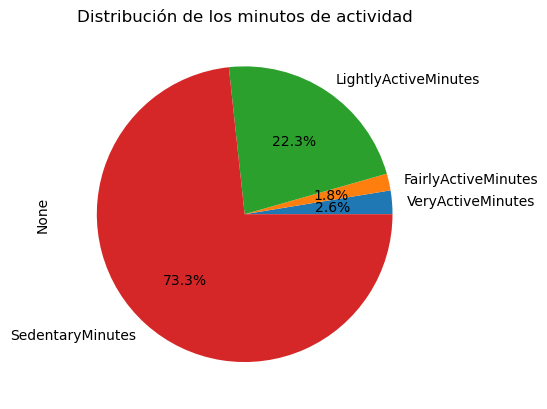

In [29]:
# grafica pie para distrbución de media de minutos

minutos_media.plot.pie(legend=False, autopct='%1.1f%%')
plt.title('Distribución de los minutos de actividad')

- En este caso, se observa que los usuarios en la distrubución de los minutos de actividad un 73,3% se consideran minutos sedentarios. Lo cual no es recomendable, para tener una buena condición física. Mientras que solo un 2,6% de estos minutos, se dedican a minutos de actividad física más deportiva.

In [30]:
# consulta de la distribución de los minutos de actividad física

df['VeryActiveMinutes'].describe()

count    410.000000
mean      25.046341
std       36.218237
min        0.000000
25%        0.000000
50%        9.000000
75%       38.000000
max      210.000000
Name: VeryActiveMinutes, dtype: float64

In [44]:
#creación de columna para definir usuarios deportivos o no

for i in df.index:
    if (df.loc[i,'VeryActiveMinutes']<30):
        df.loc[i,'Sport_User'] = 'No'
    else:
        df.loc[i,'Sport_User'] = 'Yes'

In [37]:
# orden por día de la semana

order_days= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [38]:
# asignación del orden a la columna de días de la semana

df.Day_OfWeek= pd.Categorical(df.Day_OfWeek, order_days)

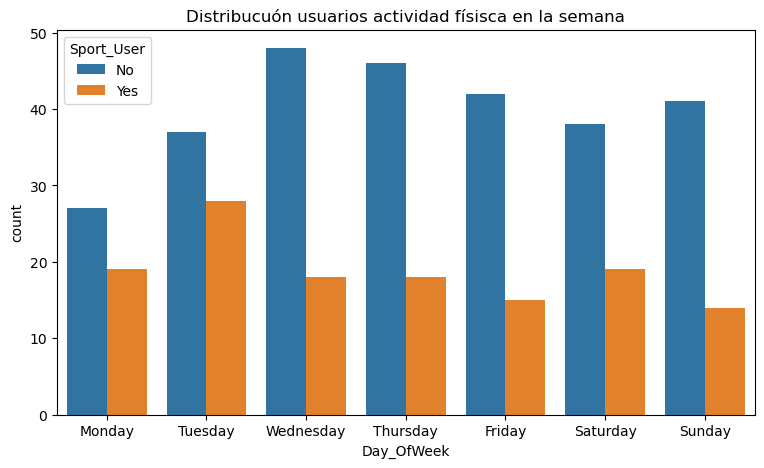

In [43]:
# consulta de actividad física de los usuarios con base a su perfil deportivo

plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='Day_OfWeek', hue='Sport_User')
plt.title('Distribucuón usuarios actividad físisca en la semana')
plt.show()

- Según la anterior gráfica, el martes suele el ser el día de la semana con mayor registro de actividad física (un mínimo de 30 minutos). Mientras que el domingo el que menor registro de actividad física se muestra.

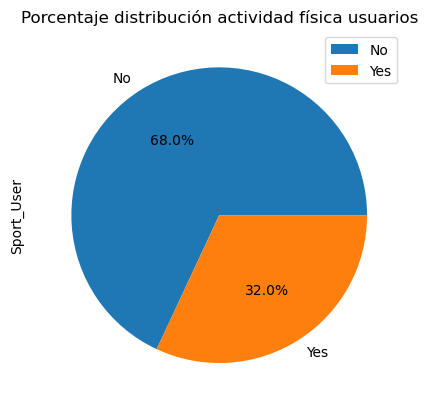

In [48]:
# creacción de variable de recuento de usuarios deportivos/o no

usuarios_recuento= df['Sport_User'].value_counts()

# grafica pie para distrbución de usuarios deportivos o no deportivos

usuarios_recuento.plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Porcentaje distribución actividad física usuarios')
plt.show()

- Como podemos obervar en la gráfica anterior, solo un 32% de las veces, los usuarios tienen un mínimo de 30 minutos de actividad física. Mientras que el otro 68% del tiempo no son tan deportivos. 

In [50]:
# consulta de la distribución del total de pasos

df['TotalSteps'].describe()

count      410.000000
mean      8514.909756
std       4157.375584
min         17.000000
25%       5188.750000
50%       8913.000000
75%      11370.250000
max      22770.000000
Name: TotalSteps, dtype: float64

- Según una investigación publicada en el **European Journal of Preventive Cardiology**: https://academic.oup.com/eurjpc/article/30/18/1975/7226309?login=false ,que analizó la relación entre los pasos diarios dados por las personas y el riesgo de muerte. Los investigadores encontraron que **caminar 4.000 pasos al día**  reducía el riesgo de muerte por cualquier causa. Considerando que 4.000 pasos vienen a ser el equivalente a los 22 minutos mínimos de actividad física recomendados, estos ya mostraban beneficios a nivel de mortalidad.

In [51]:
#creación de columna para definir pasos diarios de usuarios

for i in df.index:
    if (df.loc[i,'TotalSteps']<4000):
        df.loc[i,'Good_Steps_Diary'] = 'No'
    else:
        df.loc[i,'Good_Steps_Diary'] = 'Yes'

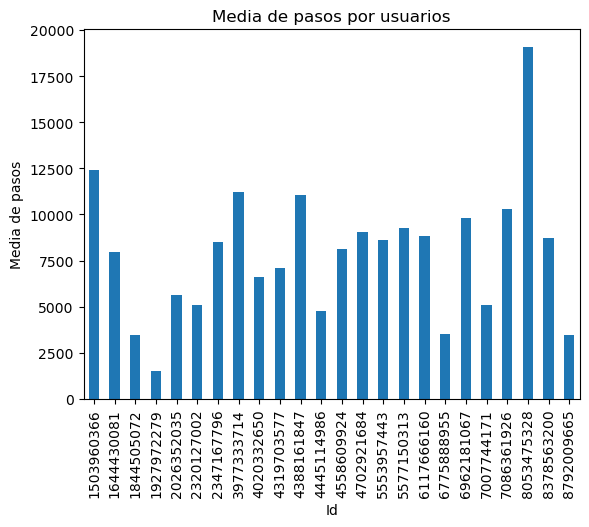

In [64]:
#agrupación de la media de pasos por ID

media_pasos_semana= df.groupby('Id')['TotalSteps'].mean()

# grafica de media de pasos por Id

media_pasos_semana.plot(kind='bar', title='Media de pasos por usuarios')
plt.ylabel('Media de pasos')
plt.show()

- Como podemos obesravr en la grafica anterior, si que están algunos usuarios que de media no están llegando al minimo de pasos diarios. En este caso, voy a consultar el porcentaje de usuarios que en base a los pasos diarios.

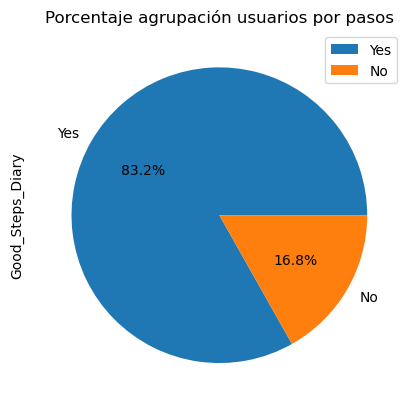

In [65]:
# creacción de variable de recuento de usuarios por pasos realizados

usuarios_pasos_grupo= df['Good_Steps_Diary'].value_counts()

# grafica pie para agrupar usuarios por pasos

usuarios_pasos_grupo.plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Porcentaje agrupación usuarios por pasos')
plt.show()

- En este caso se observa que un 83,2%  las veces, los usuarios si que están consiguiendo el minimo de pasos diarios, los cuales son necesarios para poder estar en una condición física saludable.

In [85]:
df[(df['Good_Steps_Diary']=='Yes')].transpose()

,0,1,2,3,4,5,6,7,8,9,...,389,391,392,393,394,400,401,403,404,405
Id,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,...,8378563200,8378563200,8378563200,8378563200,8378563200,8792009665,8792009665,8792009665,8792009665,8792009665
ActivityDate,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00,...,2016-05-07 00:00:00,2016-05-09 00:00:00,2016-05-10 00:00:00,2016-05-11 00:00:00,2016-05-12 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-28 00:00:00,2016-04-29 00:00:00,2016-04-30 00:00:00
TotalSteps,13162,10735,9762,12669,9705,15506,10544,9819,14371,10039,...,4468,8382,6582,9143,4561,4068,5245,6157,8360,7174
TotalDistance,8.5,6.97,6.28,8.16,6.48,9.88,6.68,6.34,9.04,6.41,...,3.54,6.65,5.22,7.25,3.62,2.6,3.36,3.94,5.35,4.59
TrackerDistance,8.5,6.97,6.28,8.16,6.48,9.88,6.68,6.34,9.04,6.41,...,3.54,6.65,5.22,7.25,3.62,2.6,3.36,3.94,5.35,4.59
LoggedActivitiesDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.092147,2.253081,2.092147,0.0,0.0,0.0,0.0,0.0,0.0
VeryActiveDistance,1.88,1.57,2.14,2.71,3.19,3.53,1.96,1.34,2.81,2.92,...,0.0,1.27,0.66,1.39,0.65,0.05,0.16,0.0,0.14,0.33
ModeratelyActiveDistance,0.55,0.69,1.26,0.41,0.78,1.32,0.48,0.35,0.87,0.21,...,0.0,0.66,0.64,0.59,0.27,0.28,0.44,0.0,0.28,0.36
LightActiveDistance,6.06,4.71,2.83,5.04,2.51,5.03,4.24,4.65,5.36,3.28,...,3.54,4.72,3.92,5.27,2.69,2.27,2.75,3.94,4.93,3.91
SedentaryActiveDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Hasta ahora, se observa que los usuarios si que pueden tener una media de pasos diarios adecuadas, aunque no por ello se pueden definir como usuarios con una intensa actividad física. Sería necesario identificar de esa media de pasos diarios, cuantos son realmente dedicados a una actividad física más intensa.

In [86]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Day_OfWeek',
       'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'Sport_User', 'Good_Steps_Diary'],
      dtype='object')

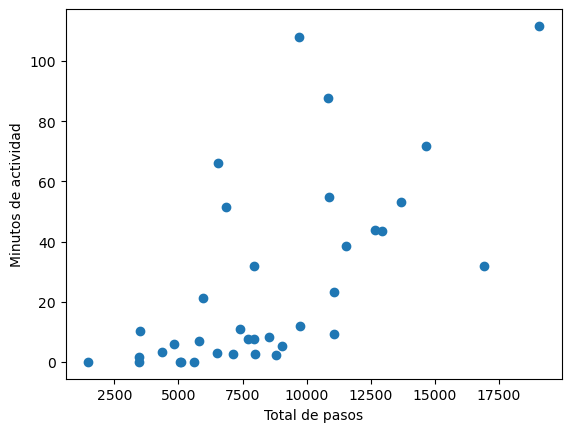

In [99]:
# distribución de la relación entre variables de pasos y minutos de actividad

grupo= df.groupby(['Id','Sport_User'])[['TotalSteps','VeryActiveMinutes']].mean().reset_index()

x=grupo['TotalSteps']
y=grupo['VeryActiveMinutes']


#creación de grafica

plt.scatter(x,y)
plt.xlabel('Total de pasos')
plt.ylabel('Minutos de actividad')
plt.show()

- Al observar la distribución del gráfico anterior, podemos observar que el hecho de que los usuarios realicen más de 4000 pasosdiarios, ellos no significa que en mucho de esos casos su actividad física de media, supere los 30 minutos.

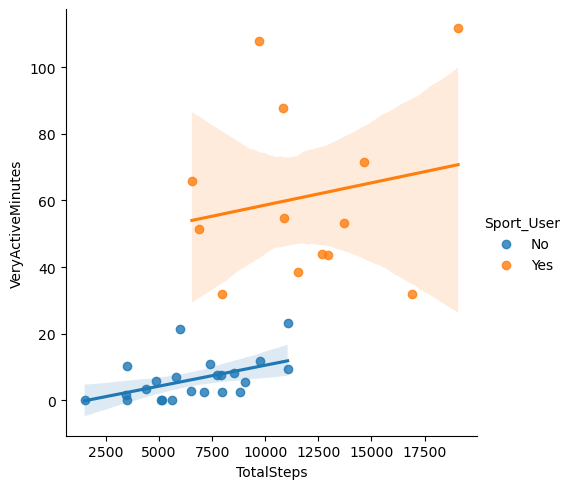

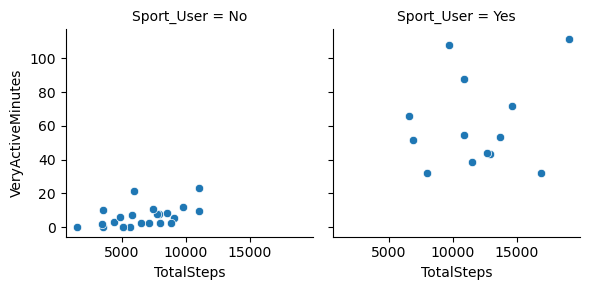

In [101]:
sns.lmplot(data=grupo, x='TotalSteps', y='VeryActiveMinutes', hue='Sport_User')

sns.relplot(kind='scatter', data=grupo, x='TotalSteps', y='VeryActiveMinutes',col='Sport_User', col_wrap=2, height=3, )
plt.show()

#### Análisis calidad de sueño por usuarios

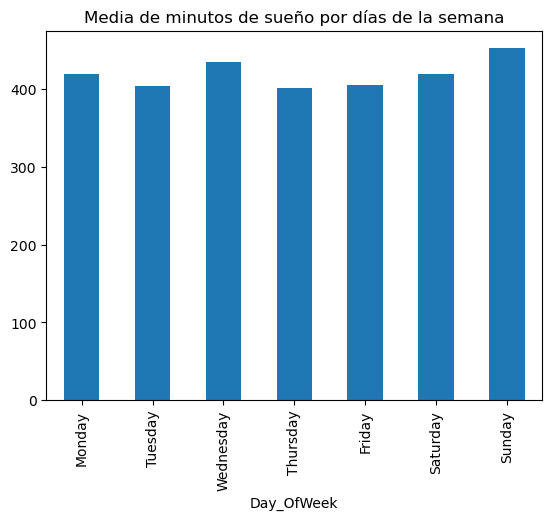

In [94]:
# agrupación del registro de minutos de seuño por días de la semana

group_dayweek_sleepactive= df.groupby('Day_OfWeek')['TotalMinutesAsleep'].mean()

# creación de gráfica para de minutos de sueño por semana

group_dayweek_sleepactive.plot(kind='bar')
plt.title('Media de minutos de sueño por días de la semana')
plt.show()

In [102]:
df['TotalMinutesAsleep'].describe()

count    410.000000
mean     419.173171
std      118.635918
min       58.000000
25%      361.000000
50%      432.500000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64

In [106]:
# creacion de columna de horas de sueño

df['TotalHourAsleep'] =round(df['TotalMinutesAsleep']/60)

In [107]:
#creación de columna para definir calidad de sueño por usuarios

for i in df.index:
    if (df.loc[i,'TotalHourAsleep']<7):
        df.loc[i,'Good_Sleep'] = 'No'
    else:
        df.loc[i,'Good_Sleep'] = 'Yes'

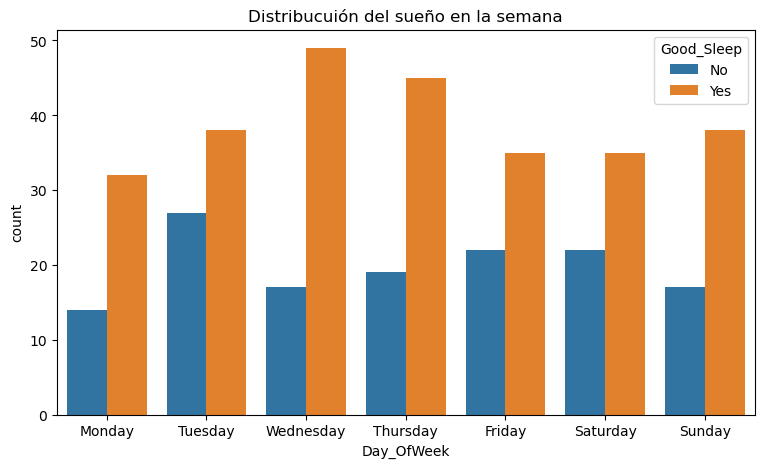

In [113]:
# recuento de calidad del sueño por dia de semana
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='Day_OfWeek', hue='Good_Sleep')
plt.title('Distribucuión del sueño en la semana')
plt.show()

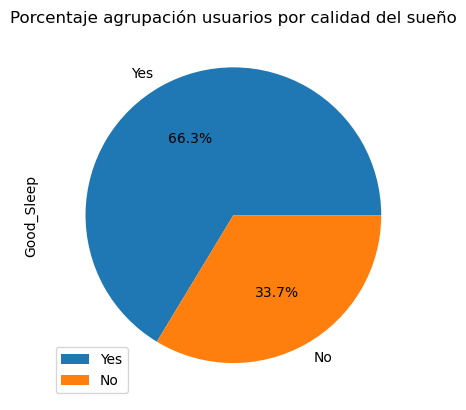

Yes    272
No     138
Name: Good_Sleep, dtype: int64


In [148]:
# creacción de variable de recuento de usuarios por calidad del sueño

usuarios_sueño= df['Good_Sleep'].value_counts()


# grafica pie para agrupar usuarios por calidad del sueño

usuarios_sueño.plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Porcentaje agrupación usuarios por calidad del sueño')
plt.show()

print(usuarios_sueño)

- En la gráfica anterior, se observa que un 66,3% de las veces los usuarios tienen un buen sueño. Sería interesante comprobar que ocurre con el 33.7% que no están durmiendo bien.

## Conclusiones

- Según este análisis, se puede definir que el martes como el día de mayor actividad.
- El usuario parece que tiene mayor calidad de sueños el miércoles.
- Un 66% de las veces, está una buena calidad de sueño con un mínimo de 7 horas. 
- Hasta ahora, se observa que los usuarios si que pueden tener una media de pasos diarios adecuadas, aunque no por ello se pueden definir como usuarios con una intensa actividad física. 
- Los minutos registran que mayoritariamente los usuarios tienen más tendencia a minutos sedentarios, un 73.3%.

### Acciones

- Para la estrategia de marketing que desea realizar el equipo de Bellabeat, se puede recomendar que el equipo se enfoque en la importancia de conseguir realizar los 30 minutos de actividad física. Se pueden enviar alertas al final de cada día, donde se haga un resumen de la actividad diaria y que les muestre un resumen de (calorías, km realizados, minutos de actividad).